<a href="https://colab.research.google.com/github/englishmuffins10/Homework-1/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Pseudocode:

Import items

Open file

Read file

Define variables: array x, array y, counter

for every line in file
  split into var1, var2
  x[count] = val1
  y[count] = val2
  count += 1

Number of elements = count

make array of y errors

make array of y errors ^2

Get S

Get Sx

Get Sy

Get ti

Get Stt

Get b

Get a

Get chi2

Get berror

Get aerror

Print Slope (b)

Print Intercept (a)

Print error in b

Print error in a

Print chi2


2) Hubble data plotted:

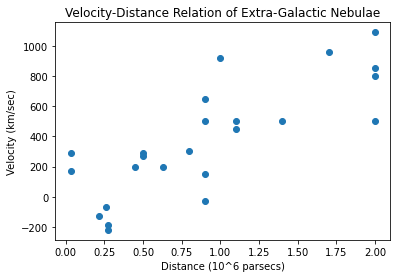

In [32]:
import numpy as np
from matplotlib import pyplot as plt

x = np.array([.032, .034, .214, .263, .275, .275, .45, .5, .5, .63, .8, .9, .9, .9, .9, 1.0, 1.1, 1.1, 1.4, 1.7, 2.0, 2.0, 2.0, 2.0])
y = np.array([170, 290, -130, -70, -185, -220, 200, 290, 270, 200, 300, -30, 650, 150, 500, 920, 450, 500, 500, 960, 500, 850, 800, 1090])

plt.scatter(x, y)
plt.xlabel("Distance (10^6 parsecs)")
plt.ylabel("Velocity (km/sec)")
plt.title("Velocity-Distance Relation of Extra-Galactic Nebulae")
plt.show()

3) Determining best fit line:

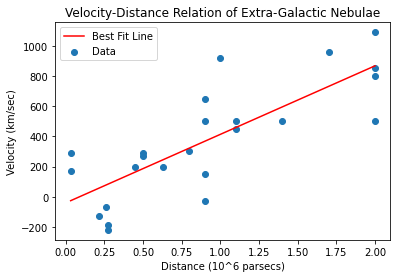

The slope of the line is:  454.16  (km/s)/Mpc


In [33]:
import numpy as np
from matplotlib import pyplot as plt

#v and r data from Table 1 of Hubble's paper
x = np.array([.032, .034, .214, .263, .275, .275, .45, .5, .5, .63, .8, .9, .9, .9, .9, 1.0, 1.1, 1.1, 1.4, 1.7, 2.0, 2.0, 2.0, 2.0])
y = np.array([170, 290, -130, -70, -185, -220, 200, 290, 270, 200, 300, -30, 650, 150, 500, 920, 450, 500, 500, 960, 500, 850, 800, 1090])
N = 24

xy = x*y
xx = x*x

#Calculate the straight line given by y(x) = a+bx:
a=( ( (1/N)*(np.sum(xy))*(np.sum(x)) ) - ( (1/N)*(np.sum(y))*(np.sum(xx)) ) ) / ( ((1/N)*((np.sum(x))**2)) - (np.sum(xx)) )
b=( ( (1/N)*(np.sum(y))*(np.sum(x)) ) - ( (np.sum(xy)) ) ) / ( ((1/N)*((np.sum(x))**2)) - (np.sum(xx)) )

plt.scatter(x, y, label= "Data")
plt.plot(x, a + b*x, "-r", label="Best Fit Line")
plt.legend(loc="upper left")
plt.xlabel("Distance (10^6 parsecs)")
plt.ylabel("Velocity (km/sec)")
plt.title("Velocity-Distance Relation of Extra-Galactic Nebulae")
plt.show()

print("The slope of the line is: ", "{:.2f}".format(b), " (km/s)/Mpc")

For some reason the slope that I have gotten is quite a bit different compared to 70 (km/s)/Mpc. I was unable to find anything wrong with my calculations but the number I have gotten is quite a bit different. Though my line seems to be similar to the dotted line on Hubble's paper.

4) Problem 3.8:

Line of best fit slope (b):  4.088e-15
Line of best fit intercept (a):  -1.731


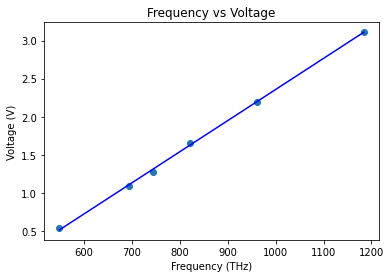

Planck's Constant:  6.549e-34


In [87]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

#drive.mount('/content/drive')
f = open('/content/drive/My Drive/millikan.txt', 'r')
f1 = f.readlines()

x = np.zeros(len(f1))
y = np.zeros(len(f1))
count = 0

for v in f1:
  val1, val2 = v.split()
  #print("val1: ", val1, " val2: ", val2)
  x[count] = val1
  y[count] = val2
  count += 1

N = count
Ex = (1/N)*(np.sum(x))
Ey = (1/N)*(np.sum(y))
Exx = (1/N)*(np.sum(x*x))
Exy = (1/N)*(np.sum(x*y))

b = ( Exy - (Ex*Ey) ) / ( Exx - ((Ex)**2) )
a = ( (Exx*Ey) - (Ex*Exy) ) / ( Exx - ((Ex)**2) )

Line = (b*x) + a

E = 10**15
print("Line of best fit slope (b): ", str(round(m*E, 3)) + "e-15")
print("Line of best fit intercept (a): ", round(c, 3))

E = 10**12
xTHz = x/E

plt.scatter(xTHz, y)
plt.plot(xTHz, Line, "-b")
plt.xlabel("Frequency (THz)")
plt.ylabel("Voltage (V)")
plt.title("Frequency vs Voltage")
plt.show()

e = 1.602 * (10**(-19))
h = b*e

E = 10**34
print("Planck's Constant: ", str(round(h*E, 3)) + "e-34")

4) But with constant fractional error of 2% on y-values:

Line of best fit slope (b):  4.023e-15
Line of best fit intercept (a):  -1.682


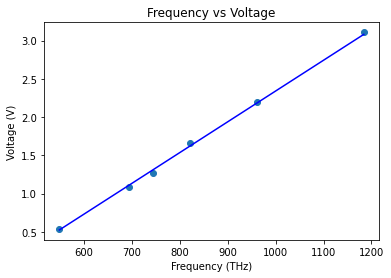

Planck's Constant:  6.445e-34
Error in b:  6.253e-17
Error in a:  0.0406
Error in h:  0.1002e-34
chi2/ndf:  1.129


In [94]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

#drive.mount('/content/drive')
f = open('/content/drive/My Drive/millikan.txt', 'r')
f1 = f.readlines()

x = np.zeros(len(f1))
y = np.zeros(len(f1))
count = 0

for v in f1:
  val1, val2 = v.split()
  #print("val1: ", val1, " val2: ", val2)
  x[count] = val1
  y[count] = val2
  count += 1

N= count
yerror = y*.02
yerror2 = yerror**2

S =  np.sum(1/yerror2)
Sx = np.sum(x/yerror2)
Sy = np.sum(y/yerror2)

t = (1/yerror)*(x - (Sx/S))

Stt = np.sum(t**2)

b = (1/Stt)*(np.sum( (t*y)/yerror ))
a = (Sy - (Sx*b)) / S

Line = (b*x) + a

E = 10**15
print("Line of best fit slope (b): ", str(round(b*E, 3)) + "e-15")
print("Line of best fit intercept (a): ", round(a, 3))

E = 10**12
xTHz = x/E

plt.scatter(xTHz, y)
plt.plot(xTHz, Line, "-b")
plt.xlabel("Frequency (THz)")
plt.ylabel("Voltage (V)")
plt.title("Frequency vs Voltage")
plt.show()

e = 1.602 * (10**(-19))
h = b*e

E = 10**34
print("Planck's Constant: ", str(round(h*E, 3)) + "e-34")

berror = np.sqrt(1/Stt)
aerror = np.sqrt( (1/S) * (1 + ( (Sx**2)/(S*Stt) )) )
herror = h * (berror/b)

chi2 = (1/(N-2)* np.sum( ((y-a - (b*x)) / yerror)**2 ))

E = 10**17
print("Error in b: ", str(round(berror*E, 3)) + "e-17")
print("Error in a: ", round(aerror, 4))
E = 10**34
print("Error in h: ", str(round(herror*E, 4)) + "e-34")
print("chi2/ndf: ", round(chi2, 3))

Change in values:

*   a: (4) -1.731    -> (4, 2%)-1.682
*   b: (4) 4.088e-15 -> (4, 2%) 4.023e-15
*   h: (4) 6.549e-34 -> (4, 2%) 6.445e-34

4) But with constant fractional error of 1% + .03V:

Line of best fit slope (b):  4.077e-15
Line of best fit intercept (a):  -1.723


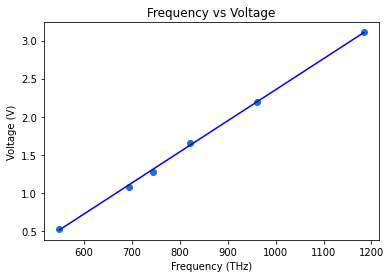

Planck's Constant:  6.532e-34
Error in b:  9.83e-17
Error in a:  0.0768
Error in h:  0.1575e-34
chi2/ndf:  0.377


In [95]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

#drive.mount('/content/drive')
f = open('/content/drive/My Drive/millikan.txt', 'r')
f1 = f.readlines()

x = np.zeros(len(f1))
y = np.zeros(len(f1))
count = 0

for v in f1:
  val1, val2 = v.split()
  #print("val1: ", val1, " val2: ", val2)
  x[count] = val1
  y[count] = val2
  count += 1

N= count
yerror = (y*.01) + .03
yerror2 = yerror**2

S =  np.sum(1/yerror2)
Sx = np.sum(x/yerror2)
Sy = np.sum(y/yerror2)

t = (1/yerror)*(x - (Sx/S))

Stt = np.sum(t**2)

b = (1/Stt)*(np.sum( (t*y)/yerror ))
a = (Sy - (Sx*b)) / S

Line = (b*x) + a

E = 10**15
print("Line of best fit slope (b): ", str(round(b*E, 3)) + "e-15")
print("Line of best fit intercept (a): ", round(a, 3))

E = 10**12
xTHz = x/E

plt.scatter(xTHz, y)
plt.plot(xTHz, Line, "-b")
plt.xlabel("Frequency (THz)")
plt.ylabel("Voltage (V)")
plt.title("Frequency vs Voltage")
plt.show()

e = 1.602 * (10**(-19))
h = b*e

E = 10**34
print("Planck's Constant: ", str(round(h*E, 3)) + "e-34")

berror = np.sqrt(1/Stt)
aerror = np.sqrt( (1/S) * (1 + ( (Sx**2)/(S*Stt) )) )
herror = h * (berror/b)

chi2 = (1/(N-2)* np.sum( ((y-a - (b*x)) / yerror)**2 ))

E = 10**17
print("Error in b: ", str(round(berror*E, 3)) + "e-17")
print("Error in a: ", round(aerror, 4))
E = 10**34
print("Error in h: ", str(round(herror*E, 4)) + "e-34")
print("chi2/ndf: ", round(chi2, 3))

Change in values:

*   chi2/ndf:           (4, 2%)1.129      -> (4, 2% +.03) 0.377
*   a: (4) -1.731    -> (4, 2%)-1.682     -> (4, 2% +.03)-1.723
*   b: (4) 4.088e-15 -> (4, 2%) 4.023e-15 -> (4, 2% +.03) 4.077e-15
*   h: (4) 6.549e-34 -> (4, 2%) 6.445e-34 -> (4, 2% +.03) 6.532e-34